# MSc Project

## Importing data 

In [3]:
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
scot_csv_file_path = "Data/Scotland Council Data .csv"
scot_data = pd.read_csv(scot_csv_file_path)

print("length of Scotland Data " + str(len(scot_data)))

scot_data.head(10)


length of Scotland Data 19008


,FeatureCode,FeatureName,FeatureType,DateCode,Measurement,Units,Value,Energy Type,Energy Consuming Sector
0,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.000,Coal,Rail
1,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,192.383,Electricity,Domestic
2,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.176,Coal,Public Sector
3,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,664.980,Gas,Domestic
4,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,250.801,Electricity,Industrial & Commercial
5,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,868.701,All,Domestic
6,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,1.127,Bioenergy & Wastes,Domestic
7,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,639.841,All,Industrial & Commercial
8,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.182,Coal,Domestic
9,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.005,Coal,Agriculture


# Preforming Exploratory Data Analysis

In [5]:
# checking number of different councils in Scotland
councils = scot_data['FeatureName'].value_counts()
print(councils)

West Dunbartonshire      576
Shetland Islands         576
Glasgow City             576
Perth and Kinross        576
Fife                     576
East Dunbartonshire      576
Dundee City              576
Angus                    576
Renfrewshire             576
City of Edinburgh        576
Argyll and Bute          576
Aberdeenshire            576
Aberdeen City            576
Stirling                 576
South Lanarkshire        576
South Ayrshire           576
Scottish Borders         576
West Lothian             576
Orkney Islands           576
North Ayrshire           576
Moray                    576
Midlothian               576
Inverclyde               576
Highland                 576
Falkirk                  576
Na h-Eileanan Siar       576
East Renfrewshire        576
East Lothian             576
East Ayrshire            576
Dumfries and Galloway    576
Clackmannanshire         576
Scotland                 576
North Lanarkshire        576
Name: FeatureName, dtype: int64


In [6]:
# as it contains the data of scotland (as whole country), we don't need that, so we will remove it.
# i'm making a copy and then start filtering 

In [7]:
scot_data_cl = scot_data[~(scot_data["FeatureName"]=="Scotland")]

In [8]:
print("length of Scotland Data " + str(len(scot_data_cl)))

length of Scotland Data 18432


In [9]:
# now we removed all scotland country instances from the dataset 

# now we see how many councils are there in scotland 

councils = scot_data_cl['FeatureName'].value_counts()
print(councils)
print("Total number of councils in Scotland : ", scot_data_cl['FeatureName'].nunique())

West Dunbartonshire      576
West Lothian             576
Glasgow City             576
Perth and Kinross        576
Fife                     576
East Dunbartonshire      576
Dundee City              576
Angus                    576
Renfrewshire             576
City of Edinburgh        576
Argyll and Bute          576
Aberdeenshire            576
Aberdeen City            576
Stirling                 576
South Lanarkshire        576
South Ayrshire           576
Shetland Islands         576
Scottish Borders         576
Orkney Islands           576
North Ayrshire           576
Moray                    576
Midlothian               576
Inverclyde               576
Highland                 576
Falkirk                  576
Na h-Eileanan Siar       576
East Renfrewshire        576
East Lothian             576
East Ayrshire            576
Dumfries and Galloway    576
Clackmannanshire         576
North Lanarkshire        576
Name: FeatureName, dtype: int64
Total number of councils in Scotland :  

In [10]:
print(scot_data_cl.dtypes)

FeatureCode                 object
FeatureName                 object
FeatureType                 object
DateCode                     int64
Measurement                 object
Units                       object
Value                      float64
Energy Type                 object
Energy Consuming Sector     object
dtype: object


In [11]:
x = scot_data_cl[(scot_data_cl['FeatureCode']=='S12000033')&(scot_data_cl['DateCode']==2005)&(scot_data_cl['Energy Consuming Sector']=='Domestic')]
print(x)

      FeatureCode    FeatureName   FeatureType  DateCode Measurement Units  \
12147   S12000033  Aberdeen City  Council Area      2005       Count   GWh   
12153   S12000033  Aberdeen City  Council Area      2005       Count   GWh   
12155   S12000033  Aberdeen City  Council Area      2005       Count   GWh   
12156   S12000033  Aberdeen City  Council Area      2005       Count   GWh   
12158   S12000033  Aberdeen City  Council Area      2005       Count   GWh   
12159   S12000033  Aberdeen City  Council Area      2005       Count   GWh   
12283   S12000033  Aberdeen City  Council Area      2005       Count   GWh   

          Value         Energy Type Energy Consuming Sector  
12147     1.644                Coal                Domestic  
12153    10.317  Bioenergy & Wastes                Domestic  
12155     5.473  Manufactured Fuels                Domestic  
12156    26.174  Petroleum Products                Domestic  
12158   516.919         Electricity                Domestic  
121

In [12]:
len(scot_data_cl)

18432

In [13]:
scot_data_cl = scot_data_cl[scot_data_cl['Energy Consuming Sector'] != 'All']

In [14]:
scot_data_cl = scot_data_cl[scot_data_cl['Energy Type'] != 'All']

In [15]:
len(scot_data_cl)

13312

In [16]:
# unique_values = df['column_name'].unique()

uq_engery_type = scot_data_cl['Energy Type'].unique()
print(uq_engery_type)
uq_engery_consume = scot_data_cl['Energy Consuming Sector'].unique()
print(uq_engery_consume)

['Coal' 'Electricity' 'Gas' 'Bioenergy & Wastes' 'Petroleum Products'
 'Manufactured Fuels']
['Rail' 'Domestic' 'Public Sector' 'Industrial & Commercial' 'Agriculture'
 'Road Transport' 'Commercial' 'Industrial']


In [17]:
# exporting data file
scot_data_cl.to_csv('Data/Scotland Council Data Cleaned.csv', index=False)

In [20]:
x = scot_data_cl[(scot_data_cl['FeatureCode']=='S12000033')&(scot_data_cl['DateCode']==2005)]
print(len(x))


26


In [21]:
### Working on cleaned Data 

In [18]:
scot_data = pd.read_csv("Data/Scotland Council Data Cleaned.csv")

In [19]:
scot_data.head(10)

,FeatureCode,FeatureName,FeatureType,DateCode,Measurement,Units,Value,Energy Type,Energy Consuming Sector
0,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.000,Coal,Rail
1,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,192.383,Electricity,Domestic
2,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.176,Coal,Public Sector
3,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,664.980,Gas,Domestic
4,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,250.801,Electricity,Industrial & Commercial
5,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,1.127,Bioenergy & Wastes,Domestic
6,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.182,Coal,Domestic
7,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.005,Coal,Agriculture
8,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,528.530,Petroleum Products,Road Transport
9,S12000039,West Dunbartonshire,Council Area,2006,Count,GWh,1.268,Bioenergy & Wastes,Domestic


In [20]:
# first see how many different features are there and in each rows how many different values there are.

In [21]:
no_col = scot_data.shape[1]
print("Number of feature in this Data Set: " + str(no_col))

Number of feature in this Data Set: 9


In [22]:
# now explore how many different values in each features.

In [23]:
# feature code

dist_Feature_code = scot_data['FeatureCode'].unique()

print("Distinct Feature Code: ", dist_Feature_code)


Distinct Feature Code:  ['S12000039' 'S12000040' 'S12000005' 'S12000006' 'S12000008' 'S12000010'
 'S12000011' 'S12000013' 'S12000014' 'S12000017' 'S12000018' 'S12000019'
 'S12000020' 'S12000021' 'S12000023' 'S12000026' 'S12000027' 'S12000028'
 'S12000029' 'S12000030' 'S12000033' 'S12000034' 'S12000035' 'S12000036'
 'S12000038' 'S12000041' 'S12000042' 'S12000045' 'S12000047' 'S12000048'
 'S12000049' 'S12000050']


there are 32 distinct feature code 

In [24]:
# feature Name

dist_Feature_name = scot_data['FeatureName'].unique()

print("Distinct Feature Name: ", dist_Feature_name)

Distinct Feature Name:  ['West Dunbartonshire' 'West Lothian' 'Clackmannanshire'
 'Dumfries and Galloway' 'East Ayrshire' 'East Lothian'
 'East Renfrewshire' 'Na h-Eileanan Siar' 'Falkirk' 'Highland'
 'Inverclyde' 'Midlothian' 'Moray' 'North Ayrshire' 'Orkney Islands'
 'Scottish Borders' 'Shetland Islands' 'South Ayrshire'
 'South Lanarkshire' 'Stirling' 'Aberdeen City' 'Aberdeenshire'
 'Argyll and Bute' 'City of Edinburgh' 'Renfrewshire' 'Angus'
 'Dundee City' 'East Dunbartonshire' 'Fife' 'Perth and Kinross'
 'Glasgow City' 'North Lanarkshire']


there are 32 different councils in Scotland

In [25]:
# feature Type

dist_Feature_type = scot_data['FeatureType'].unique()

print("Distinct Feature Type: ", dist_Feature_type)

Distinct Feature Type:  ['Council Area']


in this column only one type of values is there 

In [26]:
# feature DateCode

dist_date_code = scot_data['DateCode'].unique()

print("Distinct Date Code: ", dist_date_code)

Distinct Date Code:  [2005 2006 2007 2008 2017 2018 2019 2015 2016 2013 2012 2014 2011 2010
 2009 2020]


in this column there are 16 different values which varies from 2005 to 2020 

In [27]:
# feature Measurement

dist_Measurement = scot_data['Measurement'].unique()

print("Distinct Measurement: ", dist_Measurement)

Distinct Measurement:  ['Count']


this column contains only one distinct value.

In [28]:
# feature Units

dist_Units = scot_data['Units'].unique()

print("Distinct Units: ", dist_Feature_type)

Distinct Units:  ['Council Area']


this column contains only one distinct value.

In [29]:
# feature Energy Type

dist_Energy_Type = scot_data['Energy Type'].unique()

print("Distinct Energy Type: ", dist_Energy_Type)

Distinct Energy Type:  ['Coal' 'Electricity' 'Gas' 'Bioenergy & Wastes' 'Petroleum Products'
 'Manufactured Fuels']


The output indicates the distinct types of energy used in a given context. The different energy types listed are:

Coal

Electricity

Gas

Bioenergy & Wastes

Petroleum Products

Manufactured Fuels

In [30]:
# feature Energy Consuming Sector

dist_Energy_Consuming = scot_data['Energy Consuming Sector'].unique()

print("Distinct Energy Consuming Sector: ", dist_Energy_Consuming)

Distinct Energy Consuming Sector:  ['Rail' 'Domestic' 'Public Sector' 'Industrial & Commercial' 'Agriculture'
 'Road Transport' 'Commercial' 'Industrial']


The output lists the distinct sectors or industries that consume energy in a given context. The different sectors listed are:

Rail

Domestic

Public Sector

Industrial & Commercial

Agriculture

Road Transport

Commercial

Industrial

In [31]:
# feature Value

dist_Value = scot_data['Value'].unique()

print("Distinct Value: ", dist_Value)

Distinct Value:  [0.000000e+00 1.923830e+02 1.760000e-01 ... 3.268700e+01 1.976400e+01
 2.781782e+03]


all the values is in GWh so i will remove uneccessary columns from the dataframe

In [32]:
# removing three columns FeatureType,Measurement and Units

scot_data = scot_data.drop(["FeatureType","Measurement","Units"], axis = 1)
scot_data = scot_data.sort_values(by=['DateCode'], ascending=True)

In [33]:
print(scot_data.dtypes)
scot_data.head(10)

FeatureCode                 object
FeatureName                 object
DateCode                     int64
Value                      float64
Energy Type                 object
Energy Consuming Sector     object
dtype: object


,FeatureCode,FeatureName,DateCode,Value,Energy Type,Energy Consuming Sector
0,S12000039,West Dunbartonshire,2005,0.000,Coal,Rail
1501,S12000006,Dumfries and Galloway,2005,578.151,Electricity,Industrial & Commercial
1500,S12000006,Dumfries and Galloway,2005,403.875,Electricity,Domestic
6691,S12000027,Shetland Islands,2005,88.748,Petroleum Products,Industrial
6693,S12000027,Shetland Islands,2005,7.092,Petroleum Products,Commercial
6791,S12000027,Shetland Islands,2005,107.461,Electricity,Domestic
6792,S12000027,Shetland Islands,2005,102.042,Electricity,Industrial & Commercial
6793,S12000027,Shetland Islands,2005,0.000,Coal,Rail
1502,S12000006,Dumfries and Galloway,2005,0.000,Coal,Rail
6794,S12000027,Shetland Islands,2005,2.971,Manufactured Fuels,Domestic


In [34]:
group_energy_type = scot_data.groupby(['DateCode', 'FeatureName', 'Energy Type'])['Value'].sum()
group_energy_consume = scot_data.groupby(['DateCode', 'FeatureName', 'Energy Consuming Sector'])['Value'].sum()

In [35]:
group_energy_type  = group_energy_type.reset_index()
group_energy_consume = group_energy_consume.reset_index()
print(group_energy_type)
print(group_energy_consume)

      DateCode    FeatureName         Energy Type     Value
0         2005  Aberdeen City  Bioenergy & Wastes    15.538
1         2005  Aberdeen City                Coal    27.641
2         2005  Aberdeen City         Electricity  2278.539
3         2005  Aberdeen City                 Gas  3145.962
4         2005  Aberdeen City  Manufactured Fuels    13.371
...        ...            ...                 ...       ...
3067      2020   West Lothian                Coal     2.488
3068      2020   West Lothian         Electricity  1180.660
3069      2020   West Lothian                 Gas  1798.285
3070      2020   West Lothian  Manufactured Fuels     8.160
3071      2020   West Lothian  Petroleum Products  1347.124

[3072 rows x 4 columns]
      DateCode    FeatureName  Energy Consuming Sector     Value
0         2005  Aberdeen City              Agriculture    11.648
1         2005  Aberdeen City               Commercial  1070.127
2         2005  Aberdeen City                 Domestic  2243

In [36]:
# Exporting Data
group_energy_type.to_csv('Data/group_energy_type.csv', index=False)
group_energy_consume.to_csv('Data/group_energy_consume.csv', index=False)


In [37]:
# ploting petrolium energy type each year so we can see the trend
e_type = 'Petroleum Products'

filter_data = data_by_energy_type[data_by_energy_type['Energy Type'] == e_type]




NameError: name 'data_by_energy_type' is not defined

## Question 1 :

How has the overall energy consumption evolved across all Scottish council areas from 2005 to 2020? Is there an upward or downward trend?


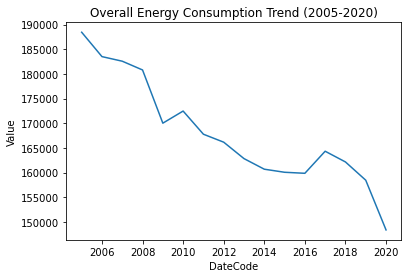

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


total_consumption_yearly = scot_data.groupby(['DateCode']).sum().reset_index()

sns.lineplot(x='DateCode', y='Value', data=total_consumption_yearly)
plt.title('Overall Energy Consumption Trend (2005-2020)')
plt.show()


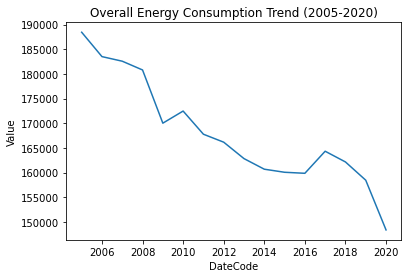

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


total_consumption_yearly = group_energy_consume.groupby(['DateCode']).sum().reset_index()

sns.lineplot(x='DateCode', y='Value', data=total_consumption_yearly)
plt.title('Overall Energy Consumption Trend (2005-2020)')
plt.show()


## Question 2 :

Which council areas have the highest and lowest energy consumption levels? How do these energy consumption levels differ across council areas?

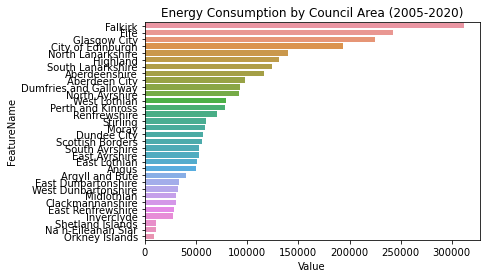

In [42]:
total_consumption_area = scot_data.groupby(['FeatureName']).sum().reset_index().sort_values(by='Value', ascending=False)

sns.barplot(x='Value', y='FeatureName', data=total_consumption_area)
plt.title('Energy Consumption by Council Area (2005-2020)')
plt.show()


## Question 3 :

How do the different energy types contribute to the total energy consumption for each council area? Which energy types have the most significant consumption?

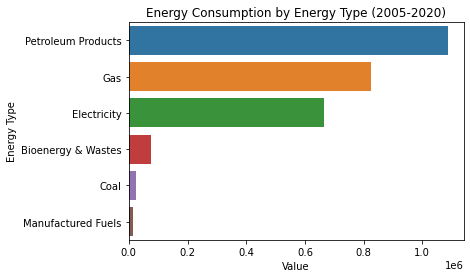

In [45]:
total_consumption_energy_type = scot_data.groupby(['Energy Type']).sum().reset_index().sort_values(by='Value', ascending=False)

sns.barplot(x='Value', y='Energy Type', data=total_consumption_energy_type)
plt.title('Energy Consumption by Energy Type (2005-2020)')
plt.show()


## Question 4:

Are there any noticeable patterns or trends in energy consumption for specific energy types across the years? Have certain energy types become more or less prevalent over time?

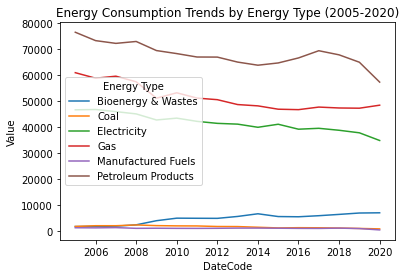

In [48]:
total_consumption_yearly_energy_type = scot_data.groupby(['DateCode', 'Energy Type']).sum().reset_index()

sns.lineplot(x='DateCode', y='Value', hue='Energy Type', data=total_consumption_yearly_energy_type)
plt.title('Energy Consumption Trends by Energy Type (2005-2020)')
plt.show()


## Question 5:

How does the energy consumption differ among various energy-consuming sectors (e.g., domestic, public, industrial, and agricultural)? Which sectors consume the most energy?

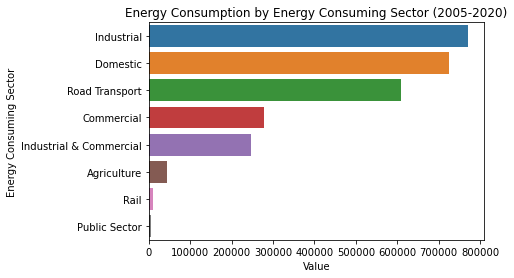

In [51]:
total_consumption_sector = scot_data.groupby(['Energy Consuming Sector']).sum().reset_index().sort_values(by='Value', ascending=False)

sns.barplot(x='Value', y='Energy Consuming Sector', data=total_consumption_sector)
plt.title('Energy Consumption by Energy Consuming Sector (2005-2020)')
plt.show()


## Question 6

Are there any significant changes in energy consumption patterns for specific energy-consuming sectors over time? Have some sectors managed to reduce their energy consumption?

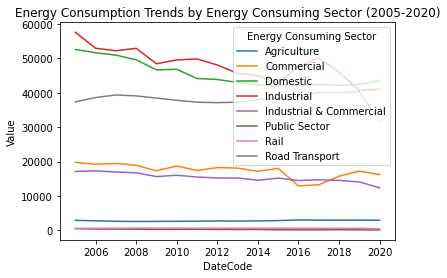

In [52]:
total_consumption_yearly_sector = scot_data.groupby(['DateCode', 'Energy Consuming Sector']).sum().reset_index()

sns.lineplot(x='DateCode', y='Value', hue='Energy Consuming Sector', data=total_consumption_yearly_sector)
plt.title('Energy Consumption Trends by Energy Consuming Sector (2005-2020)')
plt.show()


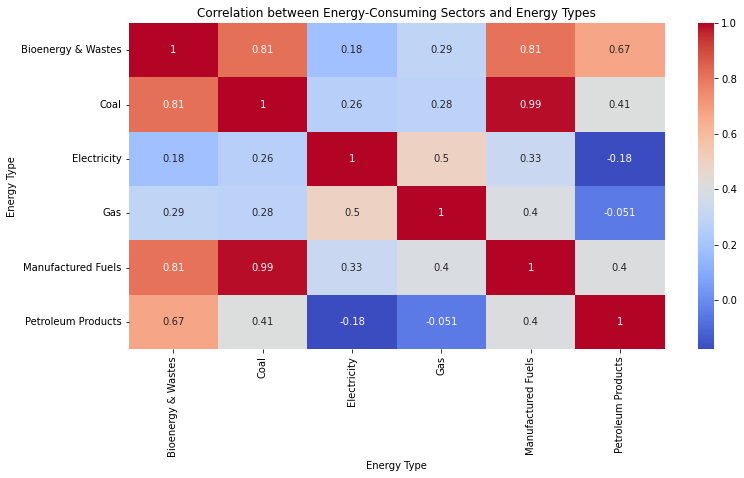

In [53]:
sector_energytype = scot_data.pivot_table(index=['Energy Consuming Sector'], columns=['Energy Type'], values='Value', aggfunc='sum').fillna(0)

# Plot a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sector_energytype.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Energy-Consuming Sectors and Energy Types')
plt.show()


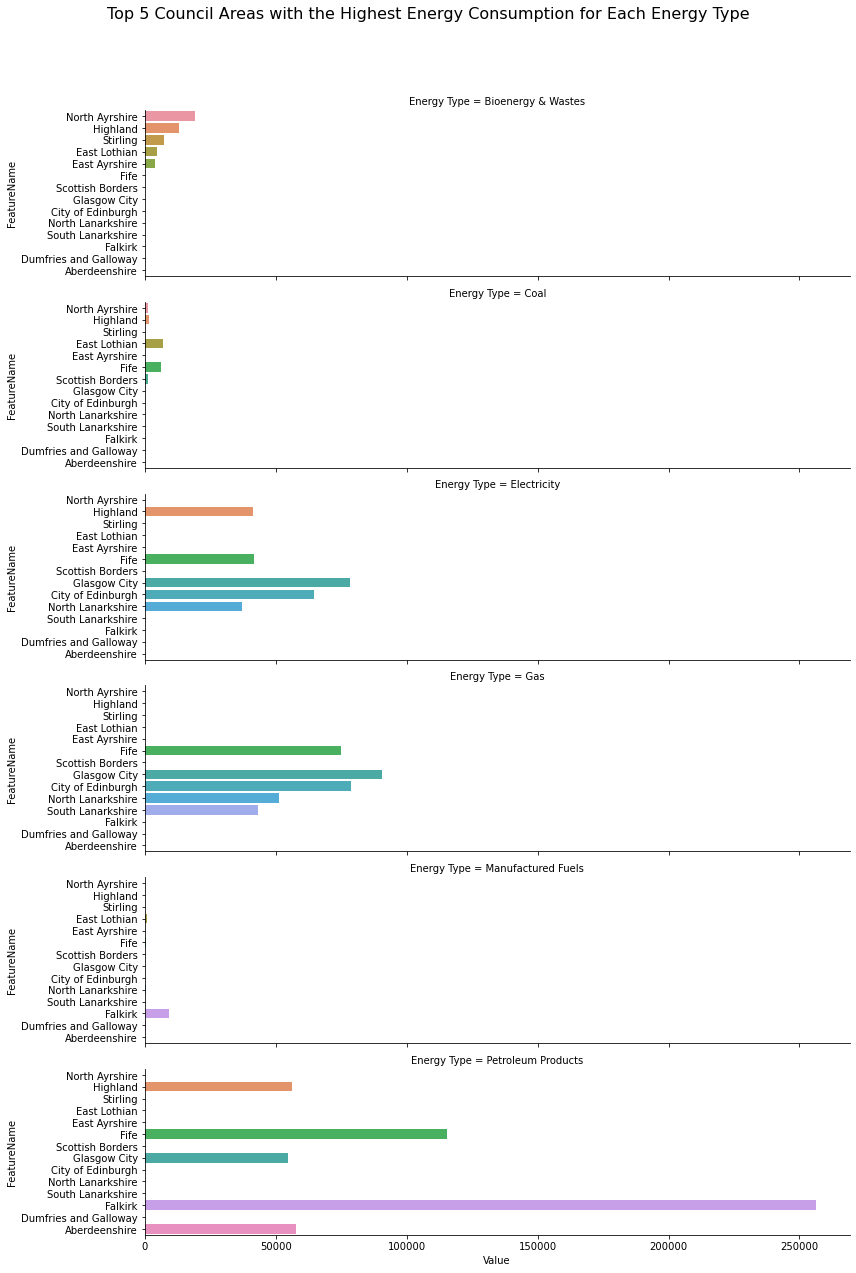

In [55]:
top_councils_energy_type = scot_data.groupby(['FeatureName', 'Energy Type']).sum().reset_index()

top_5 = top_councils_energy_type.sort_values(['Energy Type', 'Value'], ascending=[True, False]).groupby('Energy Type').head(5)

sns.catplot(data=top_5, x='Value', y='FeatureName', row='Energy Type', kind='bar', height=3, aspect=4)
plt.subplots_adjust(top=0.9)
plt.suptitle('Top 5 Council Areas with the Highest Energy Consumption for Each Energy Type', fontsize=16)
plt.show()


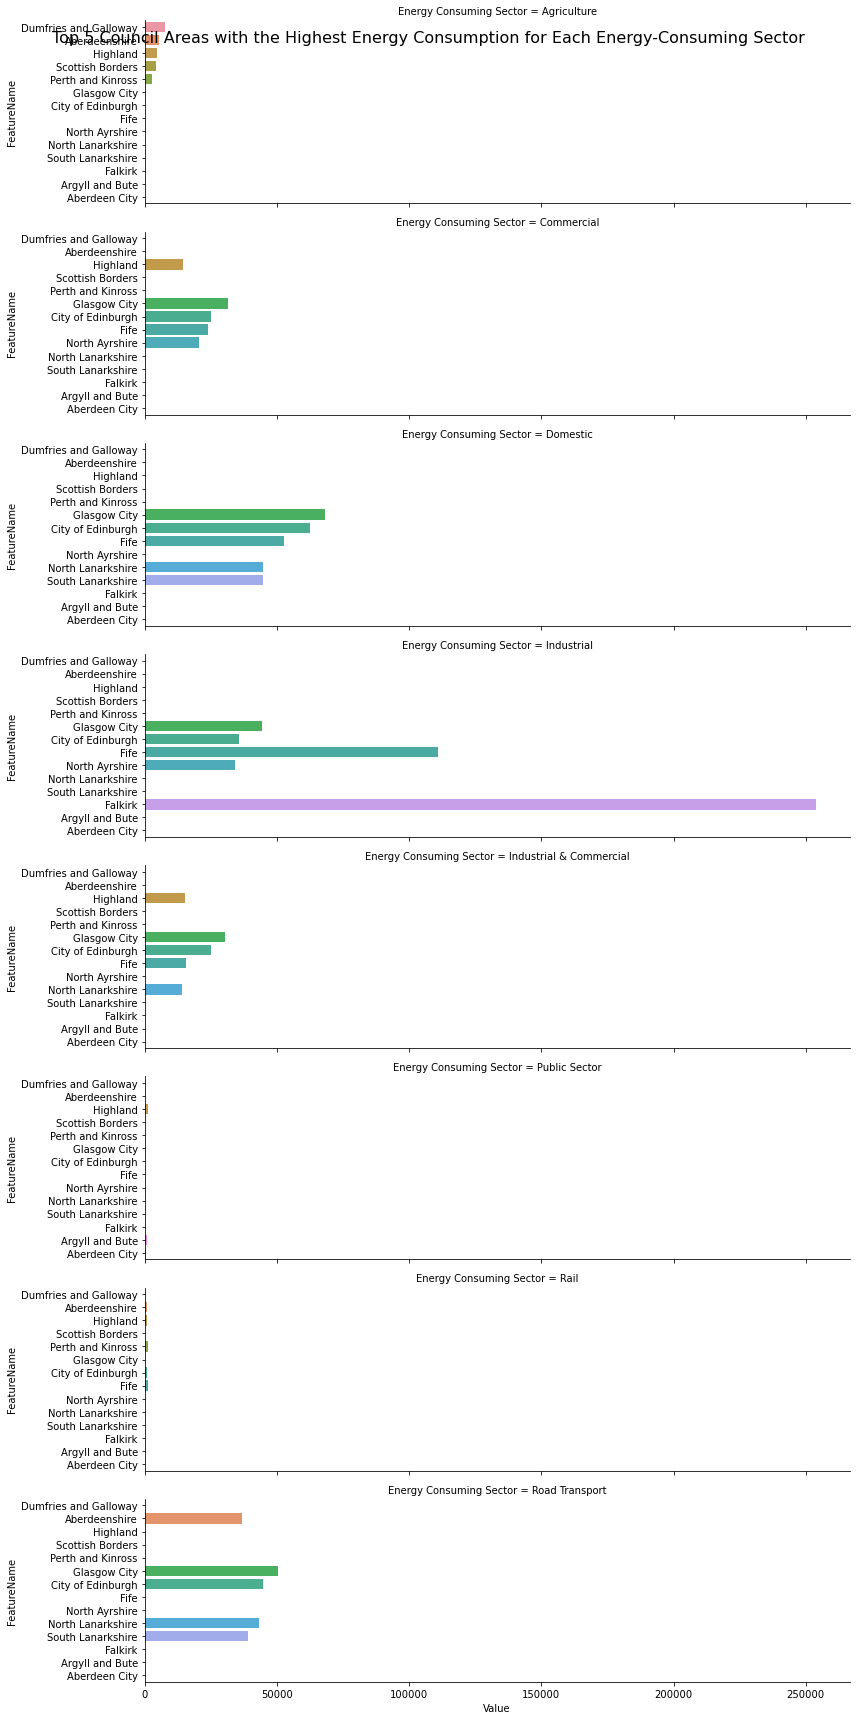

In [57]:
top_councils_sector = scot_data.groupby(['FeatureName', 'Energy Consuming Sector']).sum().reset_index()

top_5_sector = top_councils_sector.sort_values(['Energy Consuming Sector', 'Value'], ascending=[True, False]).groupby('Energy Consuming Sector').head(5)

sns.catplot(data=top_5_sector, x='Value', y='FeatureName', row='Energy Consuming Sector', kind='bar', height=3, aspect=4)
plt.suptitle('Top 5 Council Areas with the Highest Energy Consumption for Each Energy-Consuming Sector', fontsize=16)
plt.show()


In [ ]:
yearly_energy_trends = data.groupby(['DateCode', 'Energy Type'])['Value'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_energy_trends, x='DateCode', y='Value', hue='Energy Type')
plt.title('Yearly Trends in Energy Consumption for Each Energy Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Consumption (Value)', fontsize=12)
plt.legend(title='Energy Type', title_fontsize=12)
plt.show()


# Machine Learning

In [38]:
# exporting data file
scot_data.to_csv('Data/Scotland Final Model Data.csv', index=False)

In [39]:
# separate the features and target variable
X = scot_data[['FeatureCode', 'DateCode', 'Energy Consuming Sector']]
y = scot_data['Value']

In [40]:
# convert categorical features to numerical
X = pd.get_dummies(X)

In [41]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Linear Regression

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model on the test set
score = model.score(X_test, y_test)
print(score)

0.12377799152592184


# Deploying